# Plot mobility chart

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import seaborn as sns
import util
import pandas as pd
from datetime import datetime

## Loading data

In [3]:
df_mobility = pd.read_csv('data/output/df_mobilidade_nacional.csv')
df_mobility.DATA = pd.to_datetime(df_mobility.DATA, infer_datetime_format=True)
df_mobility = df_mobility.sort_values('DATA')

In [4]:
case_valleys = []

with open('data/output/valleys.csv', "r") as file:
    for line in file:
        date_str = line.strip()
        date = datetime.strptime(date_str, "%Y-%m-%d").date()
        case_valleys.append(date)

## Plot charts

In [5]:
myFmt = mdates.DateFormatter('%m/%Y')
style = dict(color='black')
sns.set(font_scale=1.1)
sns.set_style("ticks")

### Figure 4

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


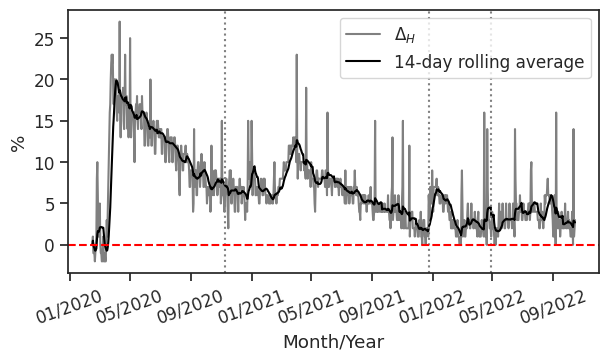

In [6]:
fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(17.4), util.centimeter_to_inch(8.7)))

plt.plot(df_mobility.DATA, df_mobility.PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS, color='gray', label='$\Delta_{H}$')
plt.plot(df_mobility.DATA, df_mobility.PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS.rolling(14, min_periods=1).mean(), color='black', label='14-day rolling average')

plt.axvline(case_valleys[0], 0, 1, linestyle=':', color='gray')
plt.axvline(case_valleys[1], 0, 1, linestyle=':', color='gray')
plt.axvline(case_valleys[2], 0, 1, linestyle=':', color='gray')

plt.axhline(0, 0, 1, linestyle='--', color='red')

ax.legend()

plt.ylabel('%')
ax.xaxis.set_major_formatter(myFmt)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel('Month/Year')
plt.xticks(rotation=20)
plt.savefig('images/national_population_mobility.eps', bbox_inches="tight")
plt.show()